PostgreSQL connection is closed


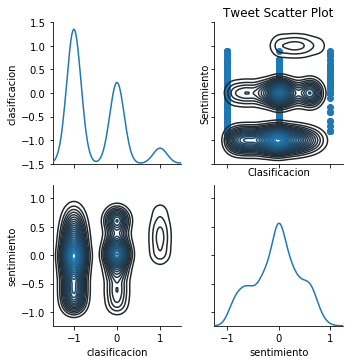

Positivos: 67|198
Neutros: 352|575
Negativos: 581|227


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:276: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ValueError: At least one label specified must be in y_true

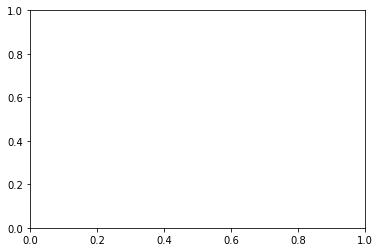

In [3]:
import psycopg2
import sys, nltk, re, string, heapq
from psycopg2 import Error

import pandas as pd
import pandas.io.sql as sqlio

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from mlxtend.plotting import plot_confusion_matrix

def crearConexion():
    
    connection = psycopg2.connect(user = "m.soto.montesinos",
                                      password = "1234",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "twitterBBVA")

    return connection

def obtenerTweets():

    try:
        
        connection = crearConexion()
        query = "select clasificacion, sentimiento from copy_training_set_bueno"
        
        tweets = sqlio.read_sql_query(query, connection)
        
    except (Exception, psycopg2.DatabaseError) as error :
    
        print ("Error obteniendo los datos", error)
    
    finally:
        
        if (connection):
            
            connection.close()
            print("PostgreSQL connection is closed")

    return tweets


def main():
    
    tweets = obtenerTweets()
    
    nombres = ['positivo', 'neutro', 'negativo']
    title        = "Confusion Matrix"
    
    #Scatter Plot
    g = sns.PairGrid(tweets)
    g.map_diag(sns.kdeplot)
    g.map_offdiag(sns.kdeplot, n_levels=30);
    
    plt.scatter(tweets["clasificacion"], tweets["sentimiento"])
    plt.xlabel('Clasificacion')
    plt.ylabel('Sentimiento')
    plt.title("Tweet Scatter Plot")
    plt.show()
    
    tweets_clasificacion_positivos = 0
    tweets_clasificacion_negativos = 0
    tweets_clasificacion_neutros   = 0
    tweets_sentimiento_positivos = 0
    tweets_sentimiento_negativos = 0
    tweets_sentimiento_neutros   = 0
    
    tweets_positivos_real = []
    tweets_neutros_real = []
    tweets_negativos_real = []
    
    tweets_positivos_prediccion = []
    tweets_neutros_prediccion = []
    tweets_negativos_prediccion = []
    
    #Distribution matrix
    for index, row in tweets.iterrows():
    
        clasificacion = (row['clasificacion'])
        sentimiento = (row['sentimiento'])
        
        #clasificacion
        if clasificacion == 0:
            
            tweets_clasificacion_neutros = tweets_clasificacion_neutros + 1
            tweets_neutros_real.append(clasificacion)
            tweets_neutros_prediccion.append(sentimiento)
            
        elif clasificacion == 1:
            
            tweets_clasificacion_positivos = tweets_clasificacion_positivos + 1
            tweets_positivos_real.append(clasificacion)
            tweets_positivos_prediccion.append(sentimiento)
            
        else:
            
            tweets_clasificacion_negativos = tweets_clasificacion_negativos + 1
            tweets_negativos_real.append(clasificacion)
            tweets_negativos_prediccion.append(sentimiento)
            
        #sentimiento
        if sentimiento < -0.3:
            
            tweets_sentimiento_negativos = tweets_sentimiento_negativos + 1
            row['sentimiento'] = -1
            
        elif sentimiento > 0.3:
            
            tweets_sentimiento_positivos = tweets_sentimiento_positivos + 1
            row['sentimiento'] = 1
            
        else:
            
            tweets_sentimiento_neutros = tweets_sentimiento_neutros + 1
            row['sentimiento'] = 0
        
    print ("Positivos: " + str(tweets_clasificacion_positivos) + "|" + str(tweets_sentimiento_positivos))
    print ("Neutros: " + str(tweets_clasificacion_neutros)  + "|" + str(tweets_sentimiento_neutros))
    print ("Negativos: " + str(tweets_clasificacion_negativos) + "|" + str(tweets_sentimiento_negativos))
    
    skplt.metrics.plot_confusion_matrix(tweets["clasificacion"], tweets["sentimiento"],
                                        title = title,
                                        normalize=False)
    plt.show()
    
    #Scatter Splot colors
    cont = 1
    x = []
    y = []
    
    for color in ['tab:red', 'tab:blue', 'tab:green']:
        
        if cont == 1:
            
            x = tweets_negativos_real
            y = tweets_negativos_prediccion
            
        elif cont == 2:
            
            x = tweets_neutros_real
            y = tweets_neutros_prediccion
            
        else:
            
            x = tweets_positivos_real
            y = tweets_positivos_prediccion
            
        plt.scatter(x, y, c=color, label=nombres,
                   alpha=0.3, edgecolors='none')
        plt.legend(nombres, bbox_to_anchor=(1.1, 1.1), loc=3)
        
        cont = cont + 1
    
    plt.xlabel('Clasificacion')
    plt.ylabel('Sentimiento')
    plt.title("Tweet Scatter Plot")
    plt.show()
    
    #Historigrama
    fig, ax1 = plt.subplots()
    fig, ax2 = plt.subplots()
    fig, ax3 = plt.subplots()
    ax1.hist(tweets_negativos_prediccion, color = "red", label = "Tweets Negativos")
    ax2.hist(tweets_neutros_prediccion, color = "blue", label = "Tweets Neutros")
    ax3.hist(tweets_positivos_prediccion, color = "green", label = "Tweets Positivos")
    ax1.set_title('Historigrama Tweets Negativos')
    ax1.set_xlabel('Clasificacion')
    ax1.set_ylabel('Sentimiento')
    ax2.set_title('Historigrama Tweets Neutros')
    ax2.set_xlabel('Sentimiento')
    ax2.set_ylabel('Sentimiento')
    ax3.set_title('Historigrama Tweets Positivos')
    ax3.set_xlabel('Clasificacion')
    ax3.set_ylabel('Sentimiento')
    
    
if __name__ == '__main__':
    main()




